## Top 30 YouTube Channels
In this activity FacetGrid is used to show the number of subscribers and the number of views for the top 30 YouTube channels.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
warnings.simplefilter("ignore")

In [ ]:
# importing the necessary dependencies
# data uploading

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#2. Get the file
downloaded = drive.CreateFile({'id':"1yzYaM67kk_JGxvNL7BnmhHadgE9LgZfZ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('youtube.csv')  
# loading the Dataset
mydata = pd.read_csv("youtube.csv")

Visualize the given data using a FacetGrid with two columns. The first column should show the number of subscribers for each YouTube channel, whereas the second column should show the number of views.

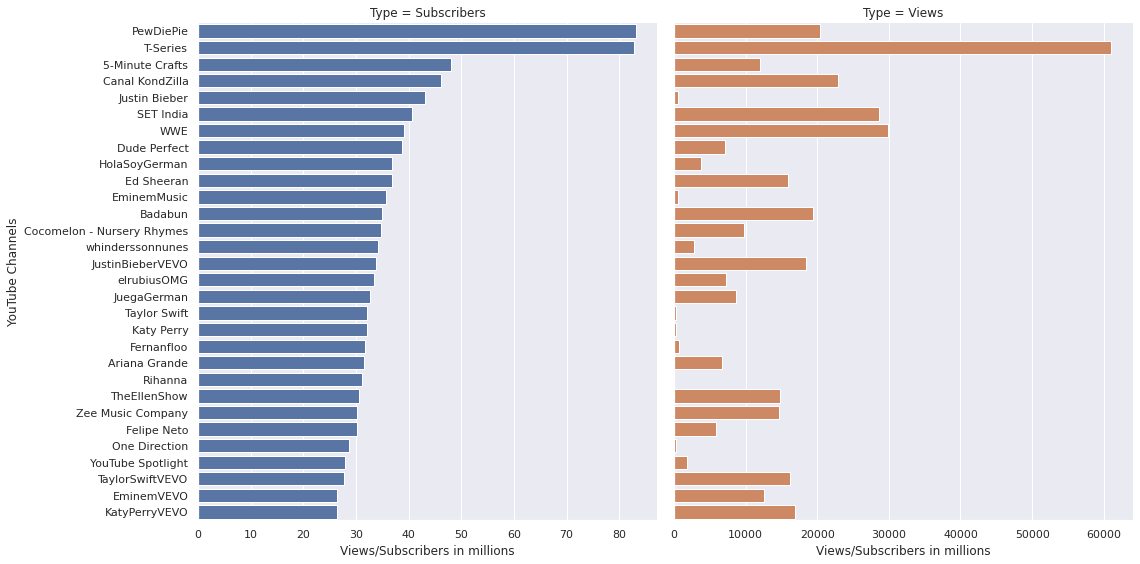

In [ ]:
channels = mydata[mydata.columns[0]].tolist()
subs = mydata[mydata.columns[1]].tolist()
views = mydata[mydata.columns[2]].tolist()
data = pd.DataFrame({'YouTube Channels': channels+channels, 
                     'Views/Subscribers in millions': subs+views,
                     'Type': ['Subscribers']*len(subs) + ['Views']*len(views)
                     })
sns.set()
g = sns.FacetGrid(data, col='Type', hue='Type', sharex=False, height=8)
g.map(sns.barplot, 'Views/Subscribers in millions', 'YouTube Channels')
plt.show()